In [114]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

# I import this library to split the information and get the train and test information from the data. I used in the step 4 from the first analysis and in the step 2 from the second analysis (Resampled Model)
from sklearn.model_selection import train_test_split

# I import this library to create the logistic model in both models.
from sklearn.linear_model import LogisticRegression

#I import this library to plot the confusion matriz and it has a clearly view of the matrix.
from sklearn.metrics import ConfusionMatrixDisplay

# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [115]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
data=pd.read_csv("Resources/lending_data.csv")

# Review the DataFrame
data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [116]:
# Separate the data into labels and features

# Separate the y variable, the labels
y=data["loan_status"]

# Separate the X variable, the features
X=data.copy()
X.drop("loan_status",axis=1,inplace=True)


In [117]:
# Review the y variable Series
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [118]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [119]:
X.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000


In [120]:
X.shape

(77536, 7)

In [122]:
# here, we can see that the database is unbalance because we dont have the same number of healthy loan and high-risk loan 
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [124]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [125]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier= LogisticRegression(random_state=1)

# Fit the model using training data
classifier.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [126]:
# with this code, i am valuate the model.
print(f"trainig Data Score: {classifier.score(X_train,y_train)}")
print(f"Testing Data Score: {classifier.score(X_test,y_test)}")

trainig Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [127]:
# Make a prediction using the testing data
predictions=classifier.predict(X_test)
results=pd.DataFrame({"Prediction":predictions,"Actual":y_test}).reset_index(drop=True)
results

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
19379,0,0
19380,0,0
19381,0,0
19382,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [128]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, predictions)

0.9520479254722232

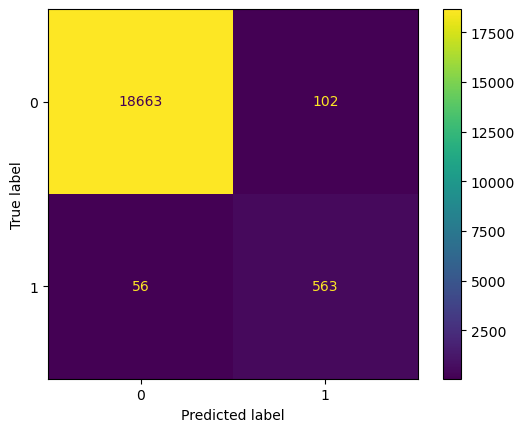

In [133]:
# Generate a confusion matrix for the model
test_matrix=confusion_matrix(y_test,predictions)

#with this code, i want to plot the confusion matrix to have a clear view of the results.
cm_display=ConfusionMatrixDisplay(confusion_matrix=test_matrix)
cm_display.plot()


In [130]:
# Print the classification report for the model
target_names=["healthy loan","high-risk loan"]
print(classification_report(y_test,predictions,target_names=target_names))

                precision    recall  f1-score   support

  healthy loan       1.00      0.99      1.00     18765
high-risk loan       0.85      0.91      0.88       619

      accuracy                           0.99     19384
     macro avg       0.92      0.95      0.94     19384
  weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** If you see the Classification report, you can see that the accuracy of the model is 99%, so the logistic regression model predict the results exactly. Also, if you see the precision of the model, the healthy loan have a precision of 100%, while the high-risk loan have a 85% of precision. Finally, when we saw the recall index's, we can see that both type of loan have a higher recall's so we can say taht the loan have a good classification's.

When we see  the confusion matrix, we can see that in the most of the cases, the model works well because the predict data have a high % of accuracy.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [131]:
# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
classifier_random=RandomOverSampler(random_state=1)
# Fit the original training data to the random_oversampler model
X_resampled,y_resampled=classifier_random.fit_resample(X_train,y_train)

In [132]:
# Count the distinct values of the resampled labels data. Here we can see that the new database is balance between healthy loans and hihg risk loans.
y_resampled.value_counts()

0    56271
1    56271
Name: loan_status, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [106]:
#here, i split the new data to start with the logistic regression model.
X_train_resampled,X_test_resampled,y_train_resampled,y_test_resampled = train_test_split(X_resampled,y_resampled,random_state=1)

In [108]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier_resampled=LogisticRegression(random_state=1)

# Fit the model using the resampled training data
classifier_resampled.fit(X_train_resampled,y_train_resampled)

# Make a prediction using the testing data
predictions_resampler=classifier_resampled.predict(X_test_resampled)
results_resampler=pd.DataFrame({"Prediction":predictions_resampler,"Actual":y_test_resampled})
results_resampler

,Prediction,Actual
104273,1,1
12806,0,0
102693,1,1
55980,0,0
103346,1,1
...,...,...
4469,0,0
92128,1,1
3569,1,1
89175,1,1


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [109]:
# Print the balanced_accuracy score of the model 
balanced_accuracy_score(y_test_resampled, predictions_resampler)

0.9942435539731302

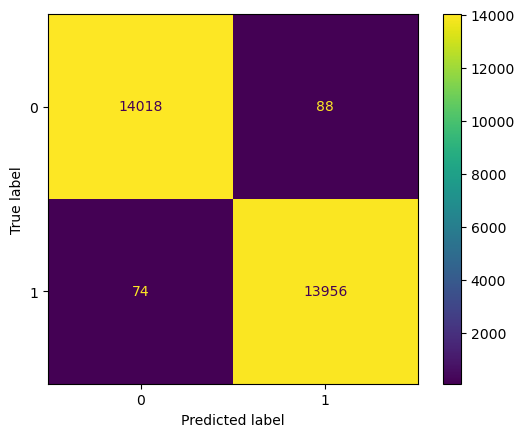

In [111]:
# Generate a confusion matrix for the model
test_matrix_resampled=confusion_matrix(y_test_resampled,predictions_resampler)

#with this code, i want to plot the confusion matrix to have a clear view of the results.
cm_display_resampled=ConfusionMatrixDisplay(confusion_matrix=test_matrix_resampled)
cm_display_resampled.plot()

In [112]:
# Print the classification report for the model
target_names=["healthy loan","high-risk loan"]
print(classification_report(y_test_resampled,predictions_resampler,target_names=target_names))

                precision    recall  f1-score   support

  healthy loan       0.99      0.99      0.99     14106
high-risk loan       0.99      0.99      0.99     14030

      accuracy                           0.99     28136
     macro avg       0.99      0.99      0.99     28136
  weighted avg       0.99      0.99      0.99     28136



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** with this new model, with resampled database, the balance accuracy is slightly higher than the last model, so we can say that this model is better, but the difference is minimun. Also, if you see the classification report, the precision and the recall to the high risk loan improve, reaching the 99% in both cases. 

When we saw the confusion matrix, also we can see that in the most of the cases, the model works well because the predict data have a high % of accuracy.